In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
hep.styles.use("ROOT")
from tqdm import tqdm, trange

In [71]:
CABLE_DELAYS = [110.8603,107.5115,107.7773,106.3038,108.3280,108.3508,108.3289,-1.0000,-1.0000,107.8173,107.1797,108.7624,107.5421,109.7707,105.7023,-1.0000,107.9614,108.2796,108.9075,107.6884,110.8722,109.2531,108.3121,107.4305,108.0444,107.5133,109.6365,108.8485,-1.0000,108.6230,106.8683,-1.0000,107.2507,109.3724,108.0100,109.9017,108.8146,107.5859,106.3367,106.9298,106.3963,107.9529,107.6329,-1.0000,106.8457,106.8783,108.1815,-1.0000,108.3844,108.4062,104.8288,106.8122,110.7056,107.8115,108.5535,109.2952,108.2269,106.5739,106.7717,107.9640,106.6810,106.9498,-1.0000,-1.0000,107.8895,107.2748,106.1948,108.1219,109.9116,109.4556,108.2320,110.6304,108.3144,109.2825,109.0867,110.6470,110.1516,108.6456,107.1648,-1.0000,108.3161,105.3123,109.1941,110.1139,109.0799,106.0924,105.8460,107.3668,108.2734,104.0234,103.9115,-1.0000,108.9285,108.3535,107.6261,-1.0000,107.0141,105.9506,109.4804,109.5637,107.1957,108.2045,109.9490,107.5809,104.9930,108.5453,108.7693,106.9581,107.4469,106.6655,107.1354,-1.0000,106.0792,107.7870,106.4017,108.2206,106.5143,105.6030,105.9797,106.4802,107.0347,107.5922,-1.0000,107.5425,-1.0000,-1.0000,-1.0000,-1.0000,107.3583,108.1835,107.2531,108.9141,108.0698,108.1823,108.2120,106.6903,107.6790,108.5349,107.6794,106.3506,106.9195,108.3446,108.6691,-1.0000,106.0397,108.2218,109.1717,108.0309,108.2552,108.7114,109.0085,107.1168,107.0544,108.5167,106.1715,109.5353,108.8095,106.3616,108.7945,-1.0000,108.4165,111.0495,108.9847,108.4431,110.3110,108.8492,106.4695,111.6541,109.0150,109.3533,109.1502,106.7108,108.4765,107.4371,108.2957,-1.0000,91.5992,91.3640,-1.0000,-1.0000,91.0597,93.8882,90.4354,92.8343,90.7192,94.4611,90.9063,90.5376,91.5069,94.7884,91.9587,-1.0000,-1.0000,88.7378,82.8869,82.1998,86.4650,-1.0000,86.2743,86.8010,-1.0000,83.8197,86.0630,86.2344,108.2776,109.4881,109.5002,-1.0000,-1.0000,84.1745,86.1573,82.3323,-1.0000,88.4117,86.4742,86.1578,-1.0000,86.5861,-1.0000,86.3228,-1.0000,-1.0000,-1.0000,-1.0000,106.1943,106.9758,108.0881,105.5326,106.8220,104.6436,106.8904,105.9466,104.3101,105.8228,107.2257,106.4666,-1.0000,-1.0000,-1.0000,-1.0000,106.3148,106.8000,105.0910,105.2467,105.6061,108.0969,103.8890,106.5041,31.2720,106.7794,106.0997,105.7294,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,110.3720,118.0987,-1.0000,116.4927,117.7507,-1.0000,-1.0000,115.6186,119.6679,116.4270,-1.0000,-1.0000,-1.0000,-1.0000]
ntuple_fname = "/nfs/disk1/users/jierans/eos/eos_run149.ntuple.root"
events = uproot.open(ntuple_fname)['output']
meta = uproot.open(ntuple_fname)['meta']

pmtinfo = {}
pmtx = meta['pmtX'].array(library='numpy')[0]
pmty = meta['pmtY'].array(library='numpy')[0]
pmtz = meta['pmtZ'].array(library='numpy')[0]
pmtu = meta['pmtU'].array(library='numpy')[0]
pmtv = meta['pmtV'].array(library='numpy')[0]
pmtw = meta['pmtW'].array(library='numpy')[0]
pmtid = meta['pmtId'].array(library='numpy')[0]
pmttype = meta['pmtType'].array(library='numpy')[0]
pmt_lcn = meta['pmtChannel'].array(library='numpy')[0]

pmt_pos = np.stack([pmtx, pmty, pmtz], axis=1)
pmt_dir = np.stack([pmtu, pmtv, pmtw], axis=1)

pmtinfo['pos'] = pmt_pos
pmtinfo['dir'] = pmt_dir
pmtinfo['id'] = pmtid
pmtinfo['type'] = pmttype
pmtinfo['lcn'] = pmt_lcn


data_all_digitid = ak.to_numpy(ak.flatten(events['digitPMTID'].array()))
data_all_lcn = pmtinfo['lcn'][data_all_digitid]
data_all_digitCharge = ak.to_numpy(ak.flatten(events['digitCharge'].array()))
data_all_digitTime = ak.to_numpy(ak.flatten(events['digitTime'].array()))
data_all_fit_times = ak.to_numpy(ak.flatten(events['fitTime'].array()))
data_all_fit_peaks = ak.to_numpy(ak.flatten(events['fitPeak'].array()))
data_all_fit_baseline = ak.to_numpy(ak.flatten(events['fitBaseline'].array()))
data_all_ncrossings = ak.to_numpy(ak.flatten(events['digitNCrossings'].array()))
data_all_trigtime = ak.to_numpy(ak.flatten(events['digitLocalTriggerTime'].array()))

data_clean_hit_mask = \
    (data_all_digitCharge < 9000) & \
    (data_all_digitCharge > 0) & \
    (data_all_ncrossings == 1) & \
    (data_all_trigtime > 0) & \
    (data_all_fit_times < 200) & \
    (data_all_fit_times > 10.5) & \
    (data_all_fit_peaks < 300) & \
    (data_all_fit_peaks > 10)

tof = np.linalg.norm(pmtinfo['pos'], axis=1) / 300 * 1.34
data_all_fit_times_corrected = data_all_digitTime - np.asarray(CABLE_DELAYS)[data_all_lcn] - tof[data_all_digitid] - 10.5


In [72]:
ntuple_fname = "/home/jierans/work/eos/EosSimulations/pbomb_515nm.ntuple.root"
events = uproot.open(ntuple_fname)['output']
meta = uproot.open(ntuple_fname)['meta']

pmtinfo = {}
pmtx = meta['pmtX'].array(library='numpy')[0]
pmty = meta['pmtY'].array(library='numpy')[0]
pmtz = meta['pmtZ'].array(library='numpy')[0]
pmtu = meta['pmtU'].array(library='numpy')[0]
pmtv = meta['pmtV'].array(library='numpy')[0]
pmtw = meta['pmtW'].array(library='numpy')[0]
pmtid = meta['pmtId'].array(library='numpy')[0]
pmttype = meta['pmtType'].array(library='numpy')[0]
pmt_lcn = meta['pmtChannel'].array(library='numpy')[0]

pmt_pos = np.stack([pmtx, pmty, pmtz], axis=1)
pmt_dir = np.stack([pmtu, pmtv, pmtw], axis=1)

pmtinfo['pos'] = pmt_pos
pmtinfo['dir'] = pmt_dir
pmtinfo['id'] = pmtid
pmtinfo['type'] = pmttype
pmtinfo['lcn'] = pmt_lcn


sim_all_digitid = ak.to_numpy(ak.flatten(events['digitPMTID'].array()))
sim_all_lcn = pmtinfo['lcn'][sim_all_digitid]
sim_all_digitCharge = ak.to_numpy(ak.flatten(events['digitCharge'].array()))
sim_all_fit_times = ak.to_numpy(ak.flatten(events['fitTime'].array()))
sim_all_fit_peaks = ak.to_numpy(ak.flatten(events['fitPeak'].array()))
sim_all_fit_baseline = ak.to_numpy(ak.flatten(events['fitBaseline'].array()))
sim_all_ncrossings = ak.to_numpy(ak.flatten(events['digitNCrossings'].array()))
sim_all_trigtime = ak.to_numpy(ak.flatten(events['digitLocalTriggerTime'].array()))

sim_clean_hit_mask = \
    (sim_all_digitCharge < 9000) & \
    (sim_all_digitCharge > 0) & \
    (sim_all_ncrossings == 1) & \
    (sim_all_fit_times < 200) & \
    (sim_all_fit_times > 10.5) & \
    (sim_all_fit_peaks < 300) & \
    (sim_all_fit_peaks > 10)
sim_all_fit_times_corrected = sim_all_fit_times - 60 - tof[sim_all_digitid]

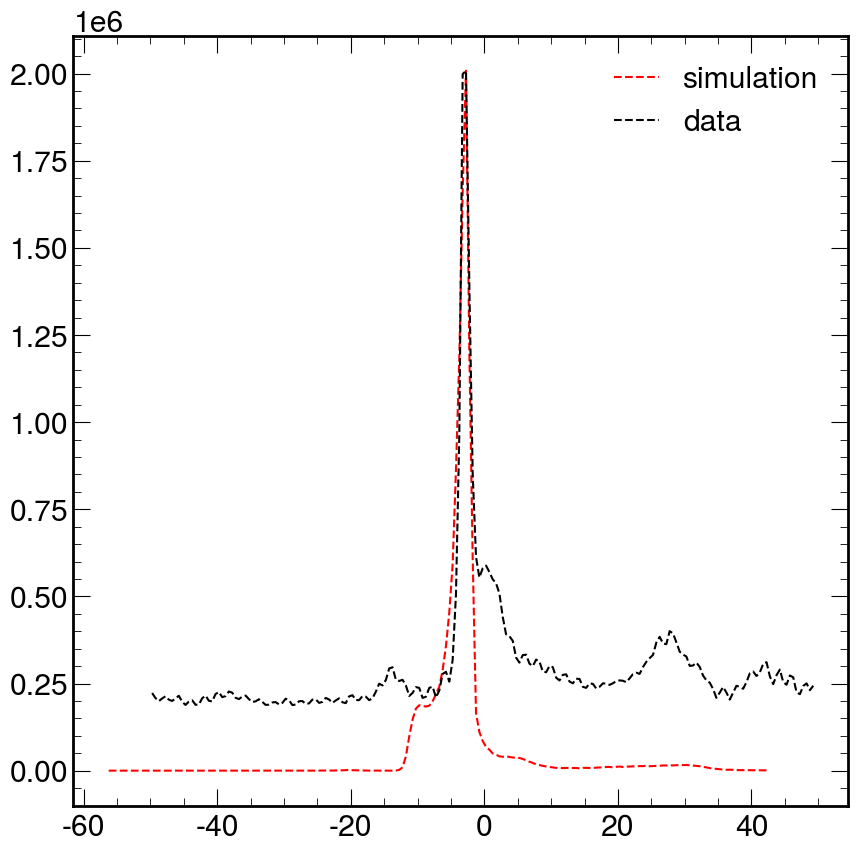

In [74]:
# data_all_fit_times_corrected = data_all_digitTime - np.asarray(CABLE_DELAYS)[data_all_lcn] - tof[data_all_digitid] - 10.5
sim_all_fit_times_corrected = sim_all_fit_times - tof[sim_all_digitid]

sim_all_fit_times_corrected_hist = np.histogram(sim_all_fit_times_corrected, bins=np.arange(-50, 50, 0.5))
data_all_fit_times_corrected_hist = np.histogram(data_all_fit_times_corrected, bins=np.arange(-50, 50, 0.5))

hx = 0.5*(sim_all_fit_times_corrected_hist[1][:-1] + sim_all_fit_times_corrected_hist[1][1:])
hys = sim_all_fit_times_corrected_hist[0]
hyd = data_all_fit_times_corrected_hist[0]
mag_ratio = np.max(hyd) / np.max(hys)
t_offset = hx[np.argmax(hyd)] - hx[np.argmax(hys)]
# t_offset = 0
plt.plot(hx + t_offset, hys*mag_ratio, "r--", label="simulation")
plt.plot(hx, hyd, "k--", label="data")
plt.legend()

# plt.semilogy()
plt.show()

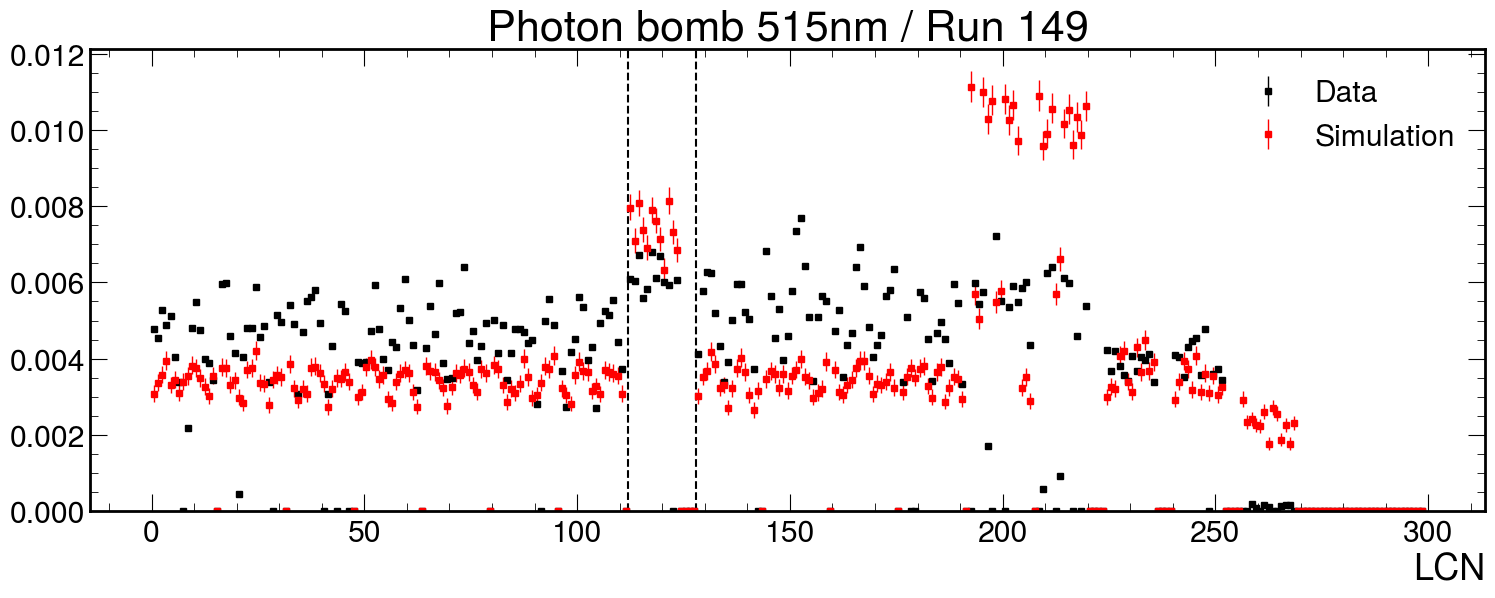

In [77]:
plt.figure(figsize=(18, 6))
hep.histplot(np.histogram(data_all_lcn[data_clean_hit_mask], bins=np.arange(300)), 
             histtype='errorbar', yerr=True, marker='s', markersize=4, color='k', density=True, label='Data')
hep.histplot(np.histogram(sim_all_lcn[sim_clean_hit_mask], bins=np.arange(300)), 
             histtype='errorbar', yerr=True, marker='s', markersize=4, color='r', density=True, label='Simulation')
plt.axvline(7*16, color='k', linestyle='--')
plt.axvline(8*16, color='k', linestyle='--')
plt.legend()
plt.xlabel("LCN")
plt.title("Photon bomb 515nm / Run 149")
plt.show()

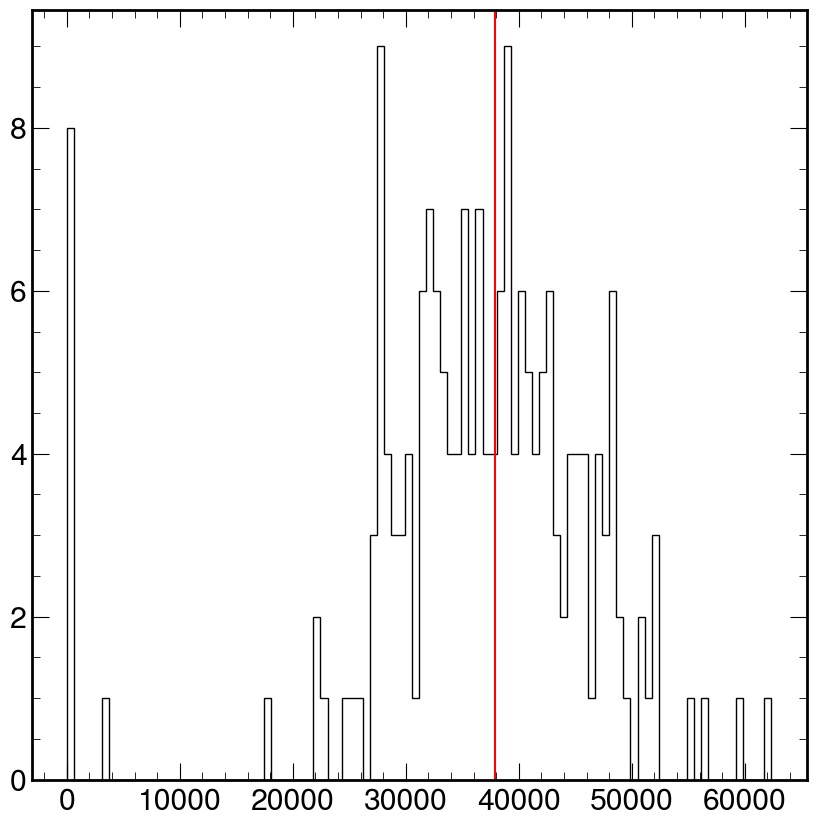

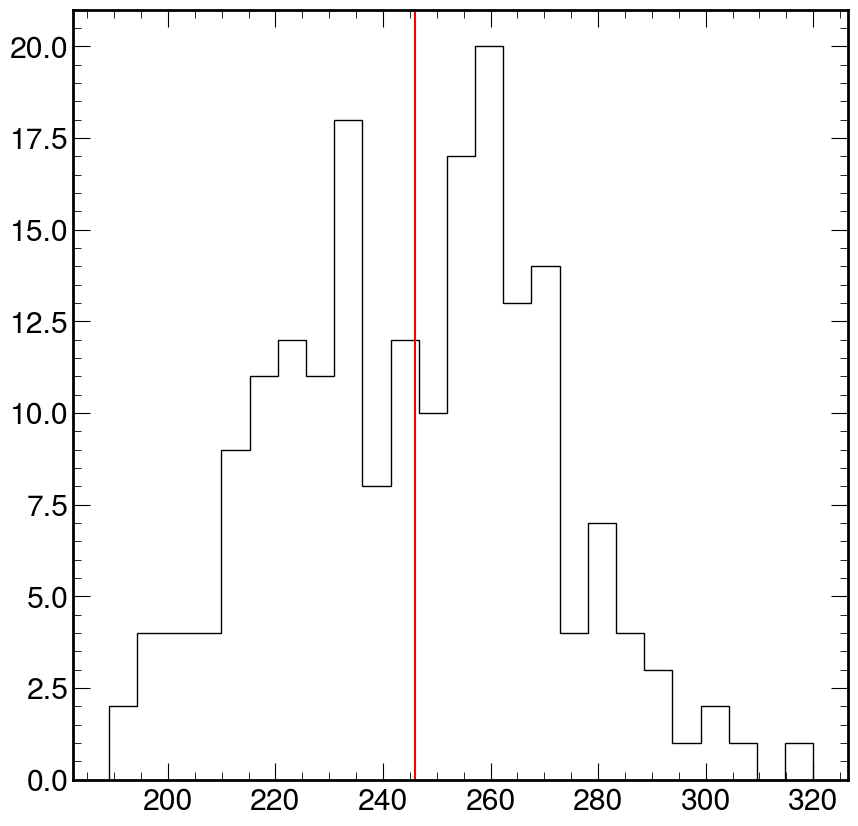

In [84]:
data_8in_mask = data_clean_hit_mask & (pmtinfo['type'][data_all_digitid] == 0)
nhit, bin_edges = np.histogram(data_all_lcn[data_8in_mask], bins=np.arange(300))
nhit = nhit[nhit != 0]
plt.hist(nhit, bins=100, histtype='step', color='k')
nhit = nhit[nhit > (np.mean(nhit))*0.15]
data_lightyield_8in = np.mean(nhit)
# plt.hist(nhit, bins=25, histtype='step', color='k')
plt.axvline(data_lightyield_8in, color='r')

plt.figure()
sim_8in_mask = sim_clean_hit_mask & (pmtinfo['type'][sim_all_digitid] == 0)
nhit, bin_edges = np.histogram(sim_all_lcn[sim_8in_mask], bins=np.arange(300))
nhit = nhit[nhit != 0]
# plt.hist(nhit, bins=100)
nhit = nhit[nhit > (np.mean(nhit))*0.15]
sim_lightyield_8in = np.mean(nhit)
plt.hist(nhit, bins=25, histtype='step', color='k')
plt.axvline(sim_lightyield_8in, color='r')

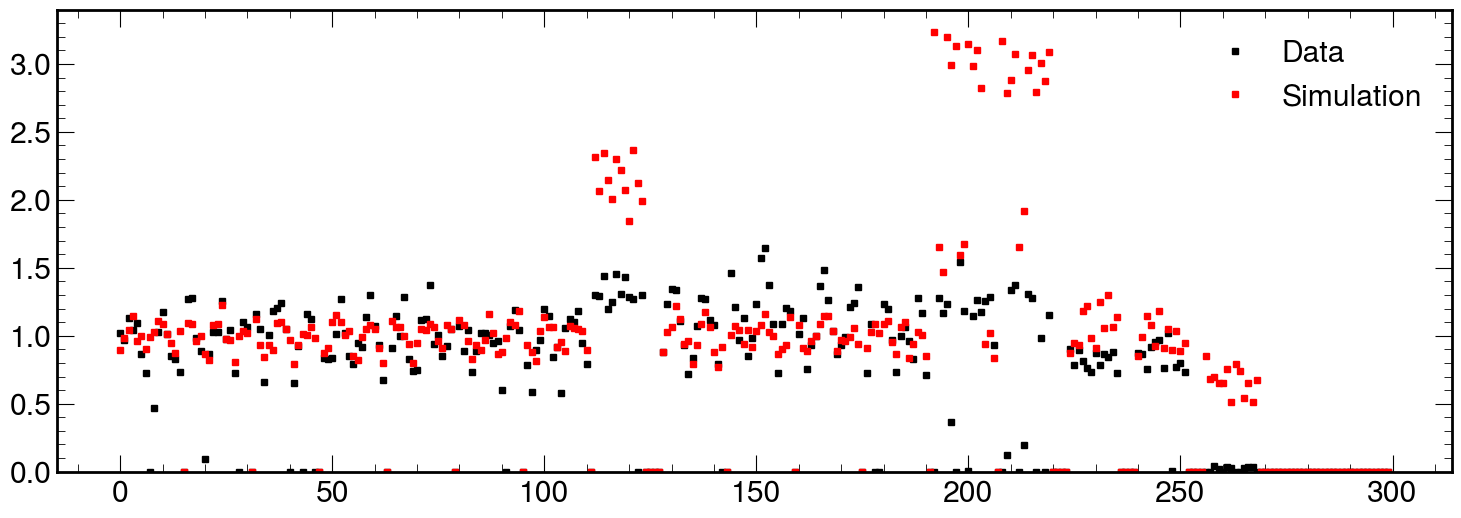

In [86]:
plt.figure(figsize=(18, 6))
mask = data_clean_hit_mask
hep.histplot(np.histogram(data_all_lcn[mask], bins=np.arange(-0.5, 300, 1),
                          weights=np.ones(data_all_lcn[mask].shape) * (1/data_lightyield_8in)), 
             histtype='errorbar', yerr=False, marker='s', markersize=4, color='k', density=False, label='Data')
mask = sim_clean_hit_mask

hep.histplot(np.histogram(sim_all_lcn[mask], bins=np.arange(-0.5, 300, 1), 
                          weights=np.ones(sim_all_lcn[mask].shape) * (1/sim_lightyield_8in)), 
             histtype='errorbar', yerr=False, marker='s', markersize=4, color='r', density=False, label='Simulation')
plt.legend()
# plt.xlim(250, 280)
plt.show()

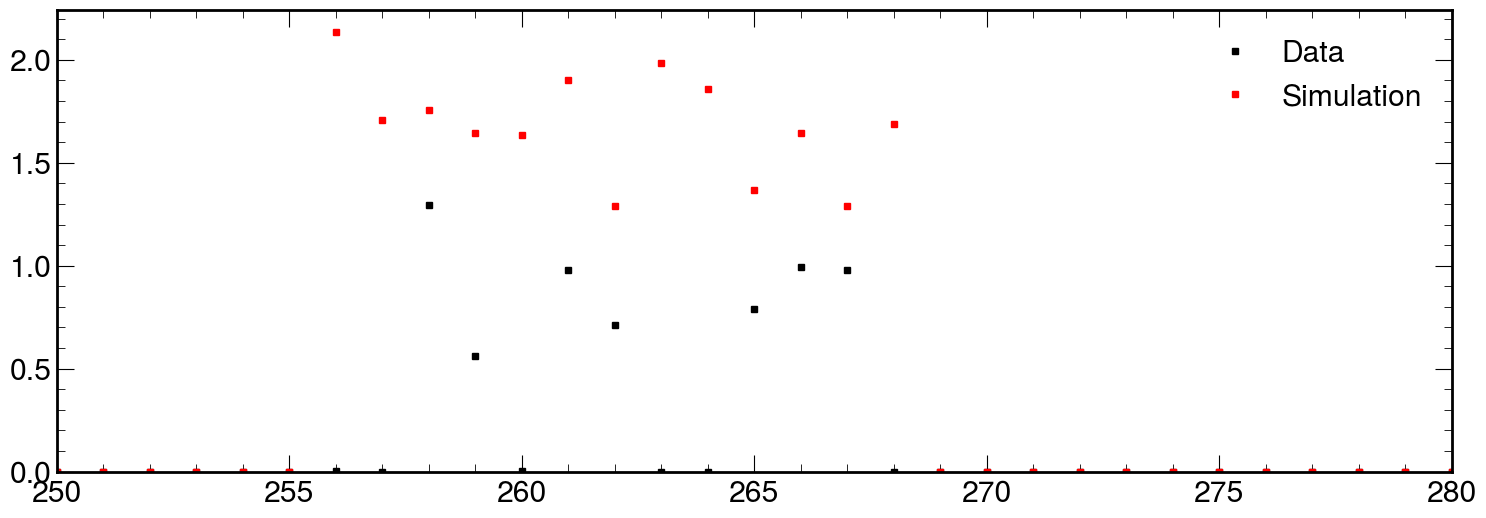

In [78]:
plt.figure(figsize=(18, 6))
mask = data_clean_hit_mask & (pmtinfo['type'][data_all_digitid] == 3)
hep.histplot(np.histogram(data_all_lcn[mask], bins=np.arange(-0.5, 300, 1),
                          weights=np.ones(data_all_lcn[mask].shape) * (1/data_lightyield_8in)), 
             histtype='errorbar', yerr=False, marker='s', markersize=4, color='k', density=False, label='Data')
mask = sim_clean_hit_mask & (pmtinfo['type'][sim_all_digitid] == 3)

hep.histplot(np.histogram(sim_all_lcn[mask], bins=np.arange(-0.5, 300, 1), 
                          weights=np.ones(sim_all_lcn[mask].shape) * (1/sim_lightyield_8in)), 
             histtype='errorbar', yerr=False, marker='s', markersize=4, color='r', density=False, label='Simulation')
plt.legend()
plt.xlim(250, 280)
plt.show()

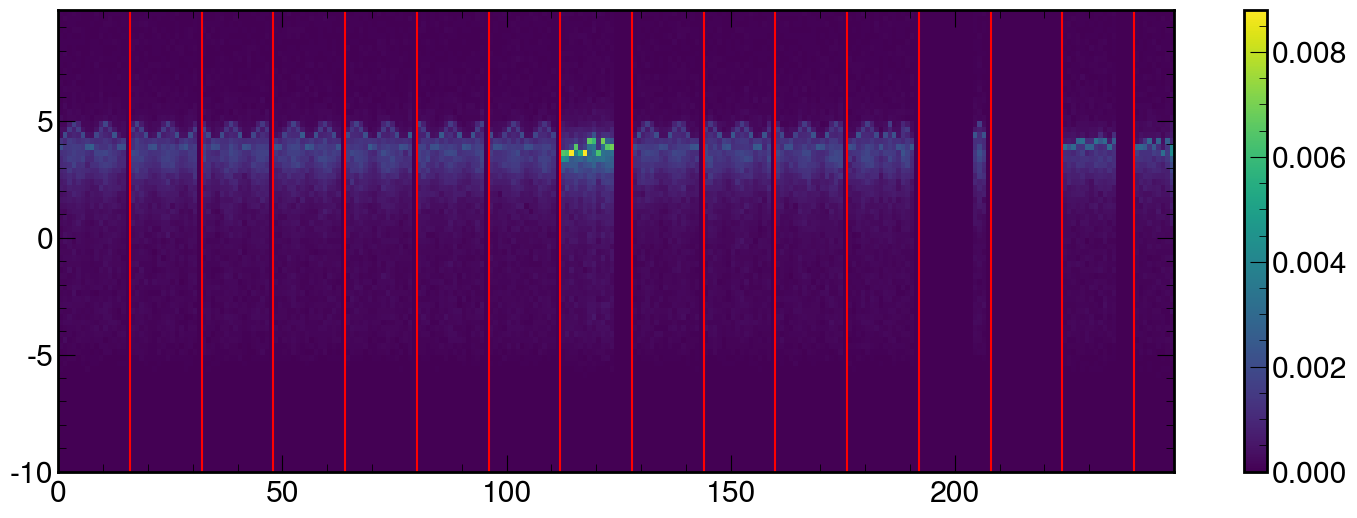

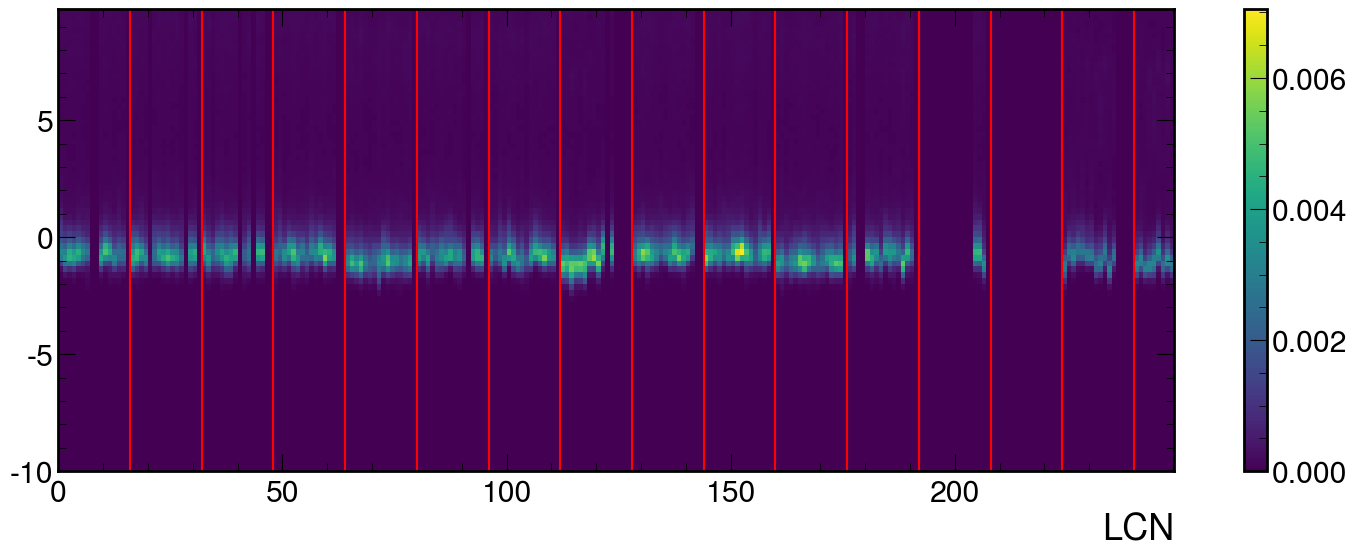

In [5]:
plt.figure(figsize=(18, 6))
sim_all_fit_times_corrected = sim_all_fit_times - 60 - tof[sim_all_digitid]
sim_8in = sim_clean_hit_mask & ((pmtinfo['type'][sim_all_digitid] == 0) | (pmtinfo['type'][sim_all_digitid] == 1))
plt.hist2d(sim_all_lcn[sim_8in], sim_all_fit_times_corrected[sim_8in], bins=(np.arange(250), np.arange(-10, 10, 0.25)), density=True)
for bid in range(16):
    plt.axvline(bid*16, color='r')

plt.colorbar()

data_all_fit_times_corrected = data_all_fit_times - np.asarray(CABLE_DELAYS)[data_all_lcn] - tof[data_all_digitid] - 10.5
data_8in = data_clean_hit_mask & ((pmtinfo['type'][data_all_digitid] == 0) | (pmtinfo['type'][data_all_digitid] == 1))
plt.figure(figsize=(18, 6))
plt.hist2d(data_all_lcn[data_8in], data_all_fit_times_corrected[data_8in], 
           bins=(np.arange(250), np.arange(-10, 10, 0.25)), density=True)
plt.colorbar()
# for lcn, delay in enumerate(CABLE_DELAYS):
#     plt.hlines(delay, lcn, lcn+1, color='r')
plt.axvline(16*12, color='r')
plt.axvline(16*14, color='r')
for bid in range(16):
    plt.axvline(bid*16, color='r')
plt.xlabel("LCN")
plt.show()

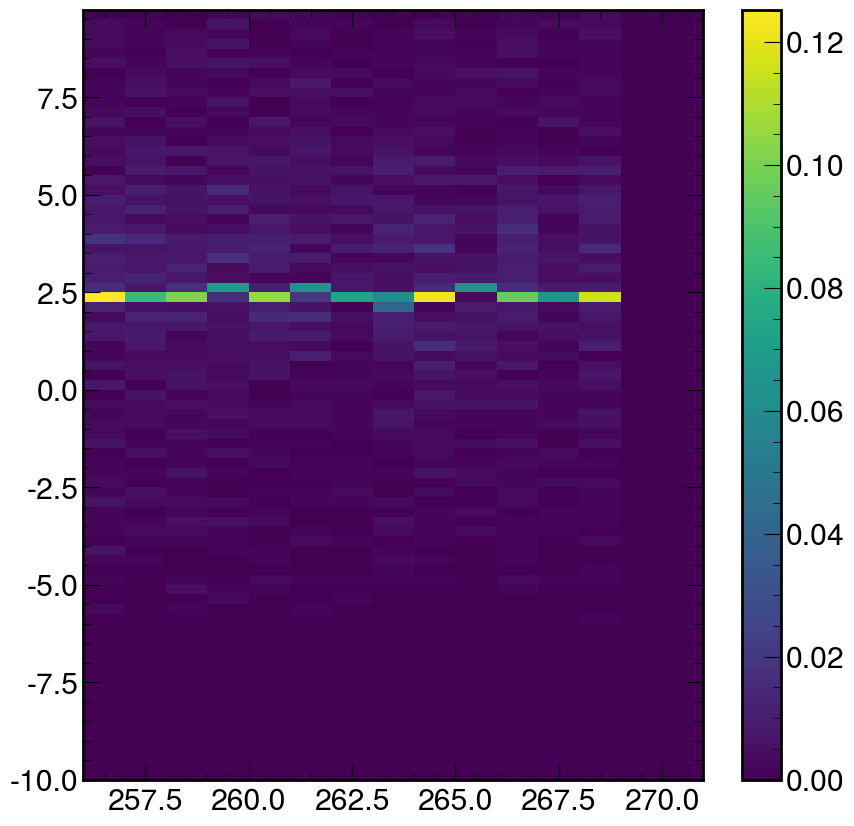

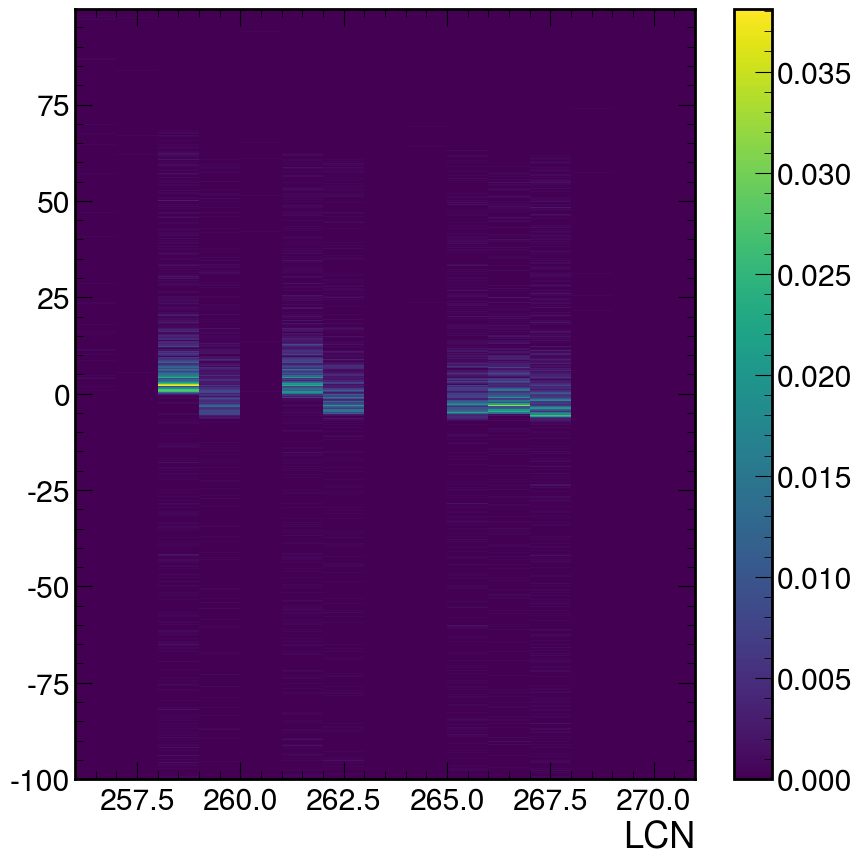

In [6]:
# plt.figure(figsize=(18, 6))
sim_all_fit_times_corrected = sim_all_fit_times - 60 - tof[sim_all_digitid]
sim_10in = sim_clean_hit_mask & (pmtinfo['type'][sim_all_digitid] == 3)
plt.hist2d(sim_all_lcn[sim_10in], sim_all_fit_times_corrected[sim_10in], bins=(np.arange(16*16, 17*16), np.arange(-10, 10, 0.25)), density=True)
for bid in range(18):
    plt.axvline(bid*16, color='r')

plt.colorbar()

data_all_fit_times_corrected = data_all_digitTime - np.asarray(CABLE_DELAYS)[data_all_lcn] - tof[data_all_digitid] - 10.5
data_10in = data_clean_hit_mask & (pmtinfo['type'][data_all_digitid] == 3)
plt.figure()
plt.hist2d(data_all_lcn[data_10in], data_all_fit_times_corrected[data_10in], 
           bins=(np.arange(16*16, 17*16), np.arange(-100, 100, 0.25)), density=True)
plt.colorbar()
# for lcn, delay in enumerate(CABLE_DELAYS):
#     plt.hlines(delay, lcn, lcn+1, color='r')
plt.axvline(16*12, color='r')
plt.axvline(16*14, color='r')
for bid in range(16):
    plt.axvline(bid*16, color='r')
plt.xlabel("LCN")
plt.show()

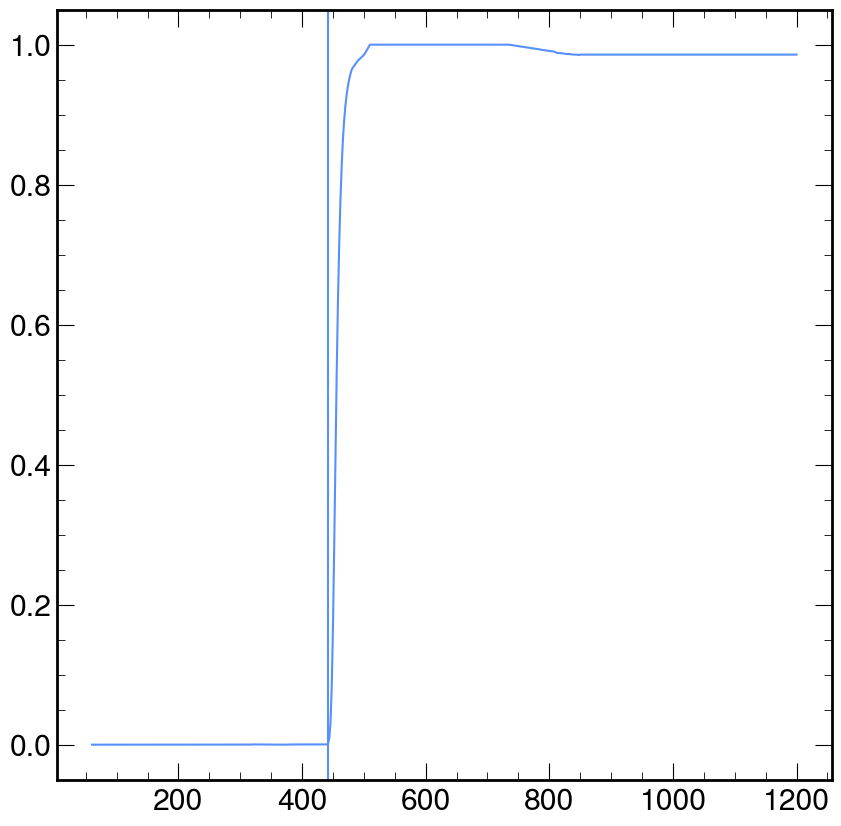

In [187]:
wvl = np.asarray([  60., 250., 252., 254., 256., 258., 260., 262., 264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286., 288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310., 312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334., 336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358., 360., 362., 364., 366., 368., 370., 372., 374., 376., 378., 380., 382., 384., 386., 388., 390., 392., 394., 396., 398., 400., 402., 404., 406., 408., 410., 412., 414., 416., 418., 420., 422., 424., 426., 428., 430., 432., 434., 436., 438., 440., 442., 444., 446., 448., 450., 452., 454., 456., 458., 460., 462., 464., 466., 468., 470., 472., 474., 476., 478., 480., 482., 484., 486., 488., 490., 492., 494., 496., 498., 500., 502., 504., 506., 508., 510., 512., 514., 516., 518., 520., 522., 524., 526., 528., 530., 532., 534., 536., 538., 540., 542., 544., 546., 548., 550., 552., 554., 556., 558., 560., 562., 564., 566., 568., 570., 572., 574., 576., 578., 580., 582., 584., 586., 588., 590., 592., 594., 596., 598., 600., 602., 604., 606., 608., 610., 612., 614., 616., 618., 620., 622., 624., 626., 628., 630., 632., 634., 636., 638., 640., 642., 644., 646., 648., 650., 652., 654., 656., 658., 660., 662., 664., 666., 668., 670., 672., 674., 676., 678., 680., 682., 684., 686., 688., 690., 692., 694., 696., 698., 700., 702., 704., 706., 708., 710., 712., 714., 716., 718., 720., 722., 724., 726., 728., 730., 732., 734., 736., 738., 740., 742., 744., 746., 748., 750., 752., 754., 756., 758., 760., 762., 764., 766., 768., 770., 772., 774., 776., 778., 780., 782., 784., 786., 788., 790., 792., 794., 796., 798., 800., 802., 804., 806., 808., 810., 812., 814., 816., 818., 820., 822., 824., 826., 828., 830., 832., 834., 836., 838., 840., 842., 844., 846., 848., 850.,1200.])

abslength = np.asarray([1.00000000e-01,1.12918341e-01,1.12847859e-01,1.12847859e-01,1.10102468e-01,1.05885986e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.12847859e-01,1.12847859e-01,1.12847859e-01,1.12918341e-01,1.12918341e-01,1.12847859e-01,1.12847859e-01,1.05885986e-01,1.00000000e-01,1.00000000e-01,1.05885986e-01,1.05885986e-01,1.05885986e-01,1.12847859e-01,1.16563699e-01,1.28604288e-01,1.29418125e-01,1.25514908e-01,1.24148969e-01,1.24148969e-01,1.24148969e-01,1.24000244e-01,1.23824232e-01,1.23824232e-01,1.23612493e-01,1.23203270e-01,1.23612493e-01,1.23612493e-01,1.23612493e-01,1.23203270e-01,1.23203270e-01,1.23203270e-01,1.20916929e-01,1.14244268e-01,1.14244268e-01,1.17029607e-01,1.12918341e-01,1.10102468e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.17369388e-01,1.23612493e-01,1.23612493e-01,1.23612493e-01,1.23613550e-01,1.23619795e-01,1.23625580e-01,1.23634127e-01,1.23643767e-01,1.23652186e-01,1.23242285e-01,1.23244504e-01,1.23242124e-01,1.23658736e-01,1.23659453e-01,1.23659089e-01,1.23658769e-01,1.23240530e-01,1.23658104e-01,1.23240149e-01,1.23240029e-01,1.23239869e-01,1.23239670e-01,1.23239376e-01,1.23239091e-01,1.23238799e-01,1.23238538e-01,1.23238302e-01,1.23238115e-01,1.22517536e-01,1.22517381e-01,1.28247439e-01,1.57933024e-01,2.12719786e-01,2.88754447e-01,4.03133644e-01,5.66395506e-01,7.98501379e-01,1.12633428e+00,1.57818905e+00,2.17613266e+00,2.95235028e+00,3.94550611e+00,5.21376811e+00,6.79648786e+00,8.67324195e+00,1.08528083e+01,1.33558994e+01,1.61757621e+01,1.93133850e+01,2.28662089e+01,2.69245209e+01,2.98698119e+01,3.20129092e+01,3.51499444e+01,3.86069016e+01,4.22086058e+01,4.59881869e+01,4.97484957e+01,5.41746544e+01,5.98662830e+01,6.81076850e+01,8.23419936e+01,1.08502710e+02,1.65466017e+02,3.55752860e+02,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,2.48313465e+03,1.73817428e+03,1.21056800e+03,8.74392016e+02,6.92882810e+02,5.93592263e+02,5.24159162e+02,4.42627325e+02,4.02707154e+02,3.52849244e+02,3.33551794e+02,3.05557553e+02,2.72793989e+02,2.52857002e+02,2.44096328e+02,2.27153957e+02,2.13328818e+02,2.02069671e+02,1.89813971e+02,1.83704650e+02,1.74771713e+02,1.66945985e+02,1.56516799e+02,1.50460361e+02,1.45888186e+02,1.38058184e+02,1.32900619e+02,1.29235720e+02,1.24588779e+02,1.20608613e+02,1.16661509e+02,1.12510311e+02,1.09342183e+02,1.07393739e+02,1.04290868e+02,1.02473889e+02,9.92592590e+01,9.23467674e+01,8.52260971e+01,8.30199486e+01,8.22217769e+01,8.17205920e+01,8.04341085e+01,7.85229753e+01,7.65026150e+01,7.57178478e+01,7.36804881e+01,7.39669834e+01,7.36441462e+01,7.25916714e+01,7.06876354e+01,7.11239523e+01,6.91841011e+01,6.92349190e+01,6.93713352e+01,6.77168811e+01,6.70126006e+01,6.94144310e+01,6.94144310e+01])

plt.plot(wvl, np.exp(-1/abslength))
plt.axvline(442)

In [194]:
np.sum((pmtinfo['type'][sim_all_digitid] == 3) & sim_clean_hit_mask)

4614